<a href="https://colab.research.google.com/github/ruhul256/PUST-Database-A-New-Bangal-Hand-Digit-Recognition/blob/main/Update_BN_Digit_Data_Recognition_using_CNN_models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from PIL import Image
import os

# Change directory to the folder containing your dataset
os.chdir('/content/drive/My Drive/Colab Notebooks/main_data')

# Initialize X (inputs/features) and Y (outputs/targets)
X = []
Y = []
# Traverse the directory tree and find all image files
for dirpath, dirnames, filenames in os.walk('.'):
    for f in filenames:
        if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png'):
            # Load image
            img = Image.open(os.path.join(dirpath, f))

            # Convert to numpy array
            img_array = np.array(img)

            # Add image to X
            X.append(img_array)

            # Add label to Y (assuming label is in the directory name)
            label = os.path.basename(os.path.normpath(dirpath))
            Y.append(label)
            
# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Print the shape of X and Y
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (5440, 120, 120, 3)
Y shape: (5440,)


In [ ]:
from PIL import Image

# Assuming X is your input image dataset
X_resized_gray = []
for i in range(len(X)):
    img = Image.fromarray(X[i])
    img_gray = img.convert('L')
    img_resized_gray = img_gray.resize((28, 28))
    X_resized_gray.append(np.array(img_resized_gray))

X_resized_gray = np.array(X_resized_gray)

In [ ]:
#Train-Test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X_resized_gray,Y,random_state=0,stratify=Y, test_size = 0.3)
from tensorflow.keras.utils import to_categorical
train_x.shape,test_x.shape,test_y.shape,train_y.shape

((3808, 28, 28), (1632, 28, 28), (1632,), (3808,))

In [ ]:
# reshape to be [samples][width][height][channels]
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1).astype('float32')

In [ ]:
# normalize inputs from 0-255 to 0-1
train_x= train_x / 255
test_x = test_x / 255
# one hot encode outputs
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
num_classes = test_y.shape[1]

In [ ]:
#  CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the k-fold cross-validation generator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the model architectures
def create_model_1():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(124, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


  # Train and evaluate the model using k-fold cross-validation
all_scores = []
for train_idx, val_idx in kfold.split(train_x):
    train_data, val_data = train_x[train_idx], train_x[val_idx]
    train_labels, val_labels = train_y[train_idx], train_y[val_idx]
    model = create_model_1()
    model.fit(train_data, train_labels, epochs=10, batch_size=32, verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_labels, verbose=0)
    print('Validation accuracy:', val_acc)
    all_scores.append(val_acc)
print('Mean validation accuracy:', np.mean(all_scores))

Validation accuracy: 0.9238845109939575
Validation accuracy: 0.930446207523346
Validation accuracy: 0.9356955289840698
Validation accuracy: 0.9250985383987427
Validation accuracy: 0.9356110095977783
Mean validation accuracy: 0.9301471590995789


In [ ]:
# build the model
model = create_model_1()
# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history_1 = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=150, batch_size=200, verbose=2,callbacks=[early_stopping])
# Get the training and testing accuracy
train_acc = history_1.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Epoch 1/150
20/20 - 3s - loss: 1.9612 - accuracy: 0.3332 - val_loss: 1.6019 - val_accuracy: 0.4865 - 3s/epoch - 136ms/step
Epoch 2/150
20/20 - 1s - loss: 1.4472 - accuracy: 0.5228 - val_loss: 1.2720 - val_accuracy: 0.5993 - 1s/epoch - 70ms/step
Epoch 3/150
20/20 - 1s - loss: 1.1211 - accuracy: 0.6381 - val_loss: 0.9681 - val_accuracy: 0.7010 - 1s/epoch - 71ms/step
Epoch 4/150
20/20 - 4s - loss: 0.8471 - accuracy: 0.7382 - val_loss: 0.7635 - val_accuracy: 0.7604 - 4s/epoch - 182ms/step
Epoch 5/150
20/20 - 3s - loss: 0.6848 - accuracy: 0.7902 - val_loss: 0.6429 - val_accuracy: 0.8229 - 3s/epoch - 159ms/step
Epoch 6/150
20/20 - 1s - loss: 0.5437 - accuracy: 0.8332 - val_loss: 0.5487 - val_accuracy: 0.8425 - 1s/epoch - 68ms/step
Epoch 7/150
20/20 - 1s - loss: 0.4797 - accuracy: 0.8545 - val_loss: 0.4742 - val_accuracy: 0.8683 - 1s/epoch - 67ms/step
Epoch 8/150
20/20 - 1s - loss: 0.3908 - accuracy: 0.8774 - val_loss: 0.4197 - val_accuracy: 0.8781 - 1s/epoch - 75ms/step
Epoch 9/150
20/20 - 1

In [ ]:
model_1=create_model_1()
model_1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 4608)              0         
                                                                 
 dense_36 (Dense)            (None, 124)               571516    
                                                                 
 dropout_18 (Dropout)        (None, 124)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                1250      
                                                     

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Make predictions
y_pred_1 = model.predict(test_x)
y_pred_labels_1 = np.argmax(y_pred_1, axis=1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(test_y, axis=1), y_pred_labels_1)
precision = precision_score(np.argmax(test_y, axis=1), y_pred_labels_1, average='weighted')
recall = recall_score(np.argmax(test_y, axis=1), y_pred_labels_1, average='weighted')
f1 = f1_score(np.argmax(test_y, axis=1), y_pred_labels_1, average='weighted')
auc_roc = roc_auc_score(test_y, y_pred_1, multi_class='ovr')

# Print results
print("Accuracy score: %.4f" % accuracy)
print("Precision score: %.4f" % precision)
print("Recall score: %.4f" % recall)
print("F1 score: %.4f" % f1)
print("AUC ROC score: %.4f" % auc_roc)

51/51 [==============================] - 0s 5ms/step
Accuracy score: 0.9393
Precision score: 0.9412
Recall score: 0.9393
F1 score: 0.9393
AUC ROC score: 0.9965


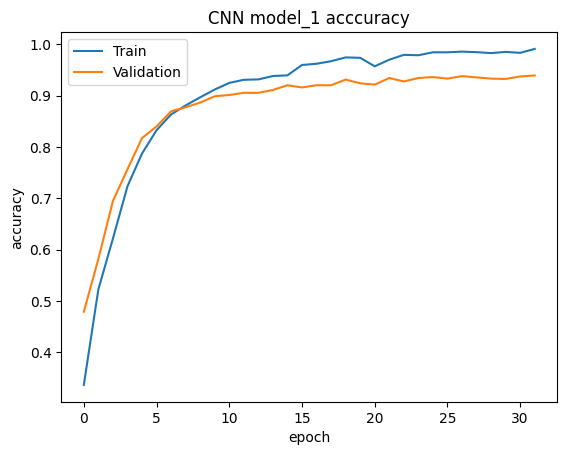

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('CNN model_1 acccuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

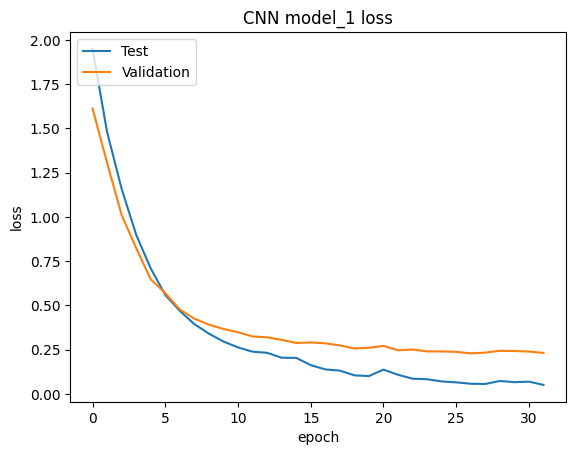

In [ ]:
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('CNN model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def create_model_2():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D((3,3)))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

 # Train and evaluate the model using k-fold cross-validation
all_scores = []
for train_idx, val_idx in kfold.split(train_x):
    train_data, val_data = train_x[train_idx], train_x[val_idx]
    train_labels, val_labels = train_y[train_idx], train_y[val_idx]
    model = create_model_2()
    model.fit(train_data, train_labels, epochs=10, batch_size=32, verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_labels, verbose=0)
    print('Validation accuracy:', val_acc)
    all_scores.append(val_acc)
print('Mean validation accuracy:', np.mean(all_scores))

Validation accuracy: 0.9566929340362549
Validation accuracy: 0.9645669460296631
Validation accuracy: 0.9580052495002747
Validation accuracy: 0.9513797760009766
Validation accuracy: 0.9526938199996948
Mean validation accuracy: 0.9566677451133728


In [ ]:
# build the model
model =create_model_2()
# Fit the model
history_2 = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=150, batch_size=200, verbose=2,callbacks=[early_stopping])
# Get the training and testing accuracy
train_acc = history_2.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Epoch 1/150
20/20 - 3s - loss: 2.1316 - accuracy: 0.2568 - val_loss: 1.8319 - val_accuracy: 0.4013 - 3s/epoch - 128ms/step
Epoch 2/150
20/20 - 2s - loss: 1.6984 - accuracy: 0.4336 - val_loss: 1.4026 - val_accuracy: 0.5411 - 2s/epoch - 90ms/step
Epoch 3/150
20/20 - 2s - loss: 1.2353 - accuracy: 0.5893 - val_loss: 1.0318 - val_accuracy: 0.6513 - 2s/epoch - 91ms/step
Epoch 4/150
20/20 - 2s - loss: 0.9152 - accuracy: 0.6946 - val_loss: 0.7260 - val_accuracy: 0.7843 - 2s/epoch - 90ms/step
Epoch 5/150
20/20 - 2s - loss: 0.7108 - accuracy: 0.7665 - val_loss: 0.5588 - val_accuracy: 0.8462 - 2s/epoch - 117ms/step
Epoch 6/150
20/20 - 3s - loss: 0.5441 - accuracy: 0.8235 - val_loss: 0.4667 - val_accuracy: 0.8664 - 3s/epoch - 168ms/step
Epoch 7/150
20/20 - 2s - loss: 0.4417 - accuracy: 0.8595 - val_loss: 0.4004 - val_accuracy: 0.8903 - 2s/epoch - 89ms/step
Epoch 8/150
20/20 - 2s - loss: 0.3751 - accuracy: 0.8847 - val_loss: 0.3412 - val_accuracy: 0.8958 - 2s/epoch - 89ms/step
Epoch 9/150
20/20 - 2

In [ ]:
model_2=create_model_2()
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1024)              0         
                                                                 
 dense_24 (Dense)            (None, 128)             

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Make predictions
y_pred_2 = model.predict(test_x)
y_pred_labels_2 = np.argmax(y_pred_2, axis=1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(test_y, axis=1), y_pred_labels_2)
precision = precision_score(np.argmax(test_y, axis=1), y_pred_labels_2, average='weighted')
recall = recall_score(np.argmax(test_y, axis=1), y_pred_labels_2, average='weighted')
f1 = f1_score(np.argmax(test_y, axis=1), y_pred_labels_2, average='weighted')
auc_roc = roc_auc_score(test_y, y_pred_2, multi_class='ovr')

# Print results
print("Accuracy score: %.4f" % accuracy)
print("Precision score: %.4f" % precision)
print("Recall score: %.4f" % recall)
print("F1 score: %.4f" % f1)
print("AUC ROC score: %.4f" % auc_roc)

51/51 [==============================] - 0s 6ms/step
Accuracy score: 0.9675
Precision score: 0.9678
Recall score: 0.9675
F1 score: 0.9675
AUC ROC score: 0.9991


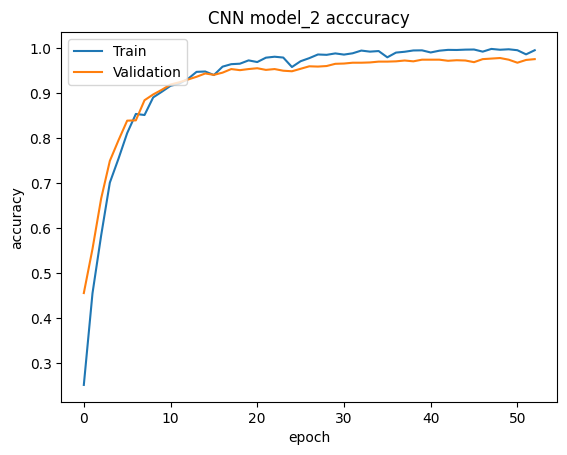

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('CNN model_2 acccuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

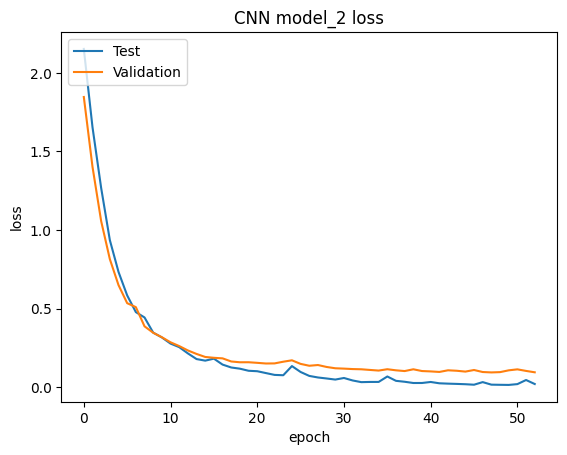

In [ ]:
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('CNN model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [ ]:
def create_model_3():
    model = Sequential()
    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Train and evaluate the model using k-fold cross-validation
all_scores = []
for train_idx, val_idx in kfold.split(train_x):
    train_data, val_data = train_x[train_idx], train_x[val_idx]
    train_labels, val_labels = train_y[train_idx], train_y[val_idx]
    model = create_model_3()
    model.fit(train_data, train_labels, epochs=10, batch_size=32, verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_labels, verbose=0)
    print('Validation accuracy:', val_acc)
    all_scores.append(val_acc)
print('Mean validation accuracy:', np.mean(all_scores))

Validation accuracy: 0.9501312375068665
Validation accuracy: 0.9527559280395508
Validation accuracy: 0.9658792614936829
Validation accuracy: 0.9566360116004944
Validation accuracy: 0.9526938199996948
Mean validation accuracy: 0.9556192517280578


In [ ]:
# build the model
model = create_model_3()
# Fit the model
history_3 = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=150, batch_size=200, verbose=2,callbacks=[early_stopping])
# Get the training and testing accuracy
train_acc = history_3.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Epoch 1/150
20/20 - 4s - loss: 2.1185 - accuracy: 0.2781 - val_loss: 1.7612 - val_accuracy: 0.4259 - 4s/epoch - 191ms/step
Epoch 2/150
20/20 - 3s - loss: 1.5824 - accuracy: 0.4674 - val_loss: 1.2724 - val_accuracy: 0.5729 - 3s/epoch - 147ms/step
Epoch 3/150
20/20 - 3s - loss: 1.1242 - accuracy: 0.6247 - val_loss: 0.8744 - val_accuracy: 0.7249 - 3s/epoch - 146ms/step
Epoch 4/150
20/20 - 4s - loss: 0.7846 - accuracy: 0.7361 - val_loss: 0.6498 - val_accuracy: 0.8119 - 4s/epoch - 209ms/step
Epoch 5/150
20/20 - 3s - loss: 0.6181 - accuracy: 0.7936 - val_loss: 0.4923 - val_accuracy: 0.8585 - 3s/epoch - 144ms/step
Epoch 6/150
20/20 - 3s - loss: 0.4771 - accuracy: 0.8477 - val_loss: 0.4436 - val_accuracy: 0.8615 - 3s/epoch - 145ms/step
Epoch 7/150
20/20 - 3s - loss: 0.4272 - accuracy: 0.8611 - val_loss: 0.3708 - val_accuracy: 0.8891 - 3s/epoch - 143ms/step
Epoch 8/150
20/20 - 4s - loss: 0.3343 - accuracy: 0.8942 - val_loss: 0.3009 - val_accuracy: 0.9222 - 4s/epoch - 211ms/step
Epoch 9/150
20/2

In [ ]:
model_3=create_model_3()
model_3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 800)               0         
                                                                 
 dense_36 (Dense)            (None, 256)             

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Make predictions
y_pred_3 = model.predict(test_x)
y_pred_labels_3 = np.argmax(y_pred_3, axis=1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(test_y, axis=1), y_pred_labels_3)
precision = precision_score(np.argmax(test_y, axis=1), y_pred_labels_3, average='weighted')
recall = recall_score(np.argmax(test_y, axis=1), y_pred_labels_3, average='weighted')
f1 = f1_score(np.argmax(test_y, axis=1), y_pred_labels_3, average='weighted')
auc_roc = roc_auc_score(test_y, y_pred_3, multi_class='ovr')

# Print results
print("Accuracy score: %.4f" % accuracy)
print("Precision score: %.4f" % precision)
print("Recall score: %.4f" % recall)
print("F1 score: %.4f" % f1)
print("AUC ROC score: %.4f" % auc_roc)

51/51 [==============================] - 0s 7ms/step
Accuracy score: 0.9694
Precision score: 0.9696
Recall score: 0.9694
F1 score: 0.9694
AUC ROC score: 0.9993


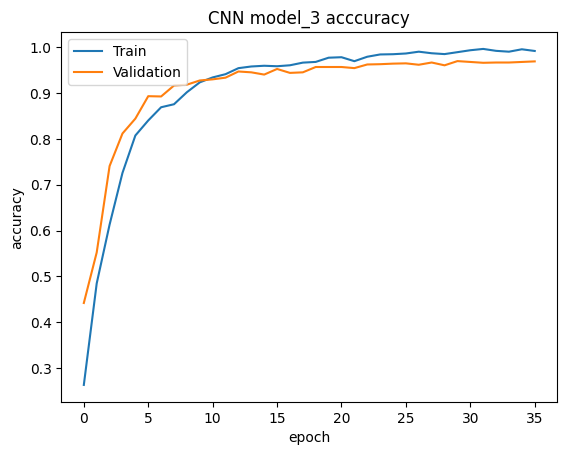

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('CNN model_3 acccuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

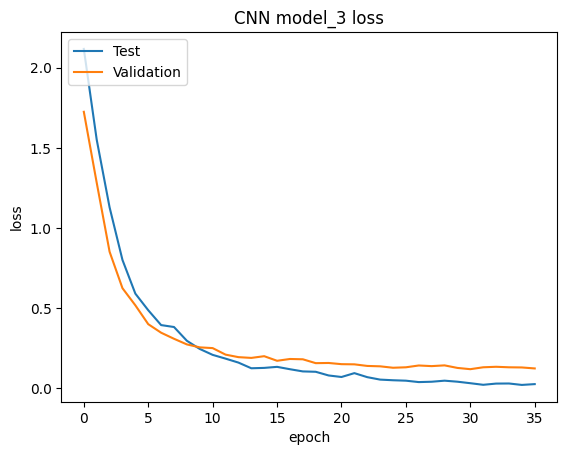

In [ ]:
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('CNN model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.ensemble import StackingClassifier
from keras.layers import Input, Dense, Dropout, Concatenate
from keras.models import Model
from keras.utils import to_categorical

In [ ]:

# Define the stacking ensemble model
def create_ensemble():
    # Create the submodels
    models = [create_model_1(), create_model_2(), create_model_3()]
    # Define the input layer
    input_layer = Input(shape=(28, 28, 1))
    # Define the output of each submodel for the input layer
    outputs = [model(input_layer) for model in models]
    # Define the concatenated output
    merge = Concatenate()(outputs)
    # Define the dense layers
    merge = Dense(256, activation='relu')(merge)
    merge = Dropout(0.3)(merge)
    merge = Dense(150, activation='relu')(merge)
    merge = Dropout(0.25)(merge)
    output_layer = Dense(10, activation='softmax')(merge)
    # create the ensemble model
    model_st = Model(inputs=input_layer, outputs=output_layer)
    # compile the model
    model_st.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_st

# Train the stacking ensemble model on the training set
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model = create_ensemble()
history_stack=model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=150, batch_size=128, validation_split=0.1,verbose=2,callbacks=[early_stopping])

# Evaluate the stacking ensemble model on the test set
loss, accuracy = model.evaluate(test_x, test_y)
print("Accuracy: ", accuracy)

Epoch 1/150
30/30 - 9s - loss: 2.2406 - accuracy: 0.1523 - val_loss: 2.0648 - val_accuracy: 0.3033 - 9s/epoch - 316ms/step
Epoch 2/150
30/30 - 6s - loss: 1.8521 - accuracy: 0.3138 - val_loss: 1.5344 - val_accuracy: 0.4406 - 6s/epoch - 191ms/step
Epoch 3/150
30/30 - 7s - loss: 1.3704 - accuracy: 0.4598 - val_loss: 1.0860 - val_accuracy: 0.6005 - 7s/epoch - 240ms/step
Epoch 4/150
30/30 - 6s - loss: 1.0019 - accuracy: 0.6090 - val_loss: 0.7283 - val_accuracy: 0.7794 - 6s/epoch - 193ms/step
Epoch 5/150
30/30 - 7s - loss: 0.6443 - accuracy: 0.7731 - val_loss: 0.4623 - val_accuracy: 0.8627 - 7s/epoch - 237ms/step
Epoch 6/150
30/30 - 6s - loss: 0.4278 - accuracy: 0.8603 - val_loss: 0.3218 - val_accuracy: 0.9020 - 6s/epoch - 194ms/step
Epoch 7/150
30/30 - 7s - loss: 0.2982 - accuracy: 0.9031 - val_loss: 0.2825 - val_accuracy: 0.9093 - 7s/epoch - 237ms/step
Epoch 8/150
30/30 - 6s - loss: 0.2203 - accuracy: 0.9312 - val_loss: 0.2348 - val_accuracy: 0.9271 - 6s/epoch - 192ms/step
Epoch 9/150
30/3

In [ ]:
model_stack=create_ensemble()
model_stack.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 sequential_25 (Sequential)     (None, 10)           573598      ['input_2[0][0]']                
                                                                                                  
 sequential_26 (Sequential)     (None, 10)           151306      ['input_2[0][0]']                
                                                                                                  
 sequential_27 (Sequential)     (None, 10)           226730      ['input_2[0][0]']                
                                                                                            

In [ ]:
# Get the training and testing accuracy
train_acc = history_stack.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Training accuracy: 0.9944853186607361
Testing accuracy: 0.9632353186607361


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Make predictions
y_pred_st = model.predict(test_x)
y_pred_labels_st = np.argmax(y_pred_st, axis=1)

# Calculate metrics
accuracy = accuracy_score(np.argmax(test_y, axis=1), y_pred_labels_st)
precision = precision_score(np.argmax(test_y, axis=1), y_pred_labels_st, average='weighted')
recall = recall_score(np.argmax(test_y, axis=1), y_pred_labels_st, average='weighted')
f1 = f1_score(np.argmax(test_y, axis=1), y_pred_labels_st, average='weighted')
auc_roc = roc_auc_score(test_y, y_pred_st, multi_class='ovr')

# Print results
print("Accuracy score: %.4f" % accuracy)
print("Precision score: %.4f" % precision)
print("Recall score: %.4f" % recall)
print("F1 score: %.4f" % f1)
print("AUC ROC score: %.4f" % auc_roc)

51/51 [==============================] - 1s 14ms/step
Accuracy score: 0.9632
Precision score: 0.9637
Recall score: 0.9632
F1 score: 0.9633
AUC ROC score: 0.9987


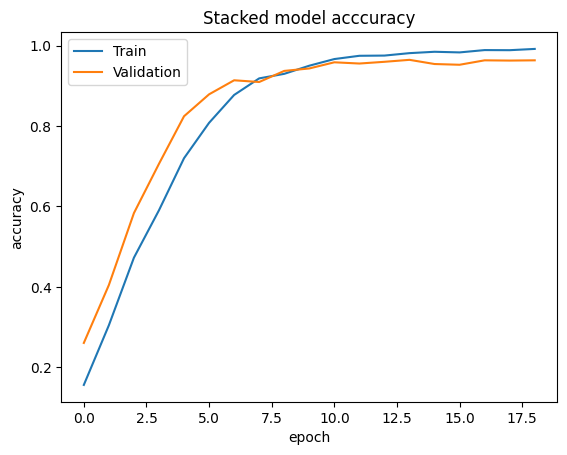

In [ ]:
# summarize history for accuracy
plt.plot(history_stack.history['accuracy'])
plt.plot(history_stack.history['val_accuracy'])
plt.title('Stacked model acccuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

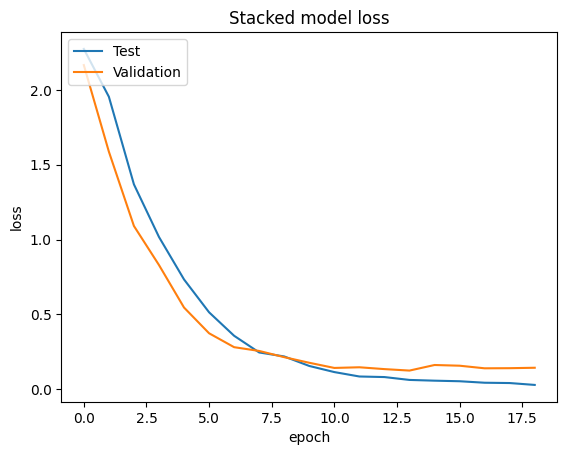

In [ ]:
# summarize history for loss
plt.plot(history_stack.history['loss'])
plt.plot(history_stack.history['val_loss'])
plt.title('Stacked model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Test', 'Validation'], loc='upper left')
plt.show()